In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the dataset
df=pd.read_csv('Car_prices.csv')
df

,Brand,Year,Kilometers Driven,Fuel Type,No of Owners,Price(in rupees)
0,Hyundai Grand I10,2015,56000.0,PETROL,1st,430000
1,Hyundai Xcent,2018,38000.0,PETROL,1st,575000
2,Honda Amaze,2017,68716.0,PETROL,1st,490000
3,Skoda Superb,2010,999999,PETROL,Second,300000
4,Hyundai I10,2012,90000,PETROL,Second,230000
...,...,...,...,...,...,...
5995,Maruti Suzuki Zen,2003,93141.0,PETROL,2nd,85000
5996,Maruti Suzuki Swift,2013,63000.0,DIESEL,2nd,320000
5997,Bmw X5,2017,55000.0,DIESEL,1st,4489000
5998,Hyundai I20,2012,62000.0,PETROL,1st,295000


In [4]:
#checking the contents of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              6000 non-null   object
 1   Year               6000 non-null   object
 2   Kilometers Driven  6000 non-null   object
 3   Fuel Type          6000 non-null   object
 4   No of Owners       6000 non-null   object
 5   Price(in rupees)   6000 non-null   object
dtypes: object(6)
memory usage: 281.4+ KB


In [5]:
#checking the length 
df.shape

(6000, 6)

In [6]:
# Missing Values
print(df.isna().sum())

Brand                0
Year                 0
Kilometers Driven    0
Fuel Type            0
No of Owners         0
Price(in rupees)     0
dtype: int64


<AxesSubplot:>

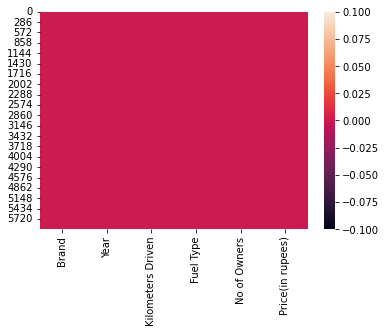

In [7]:
#using the heatmap
sns.heatmap(df.isnull())

In [8]:
#dropping columns
df.dropna(how='any',inplace=True)

In [9]:
#using filter
df.isna().values.any()

False

In [10]:
df['Brand'].unique()

array(['Hyundai Grand I10', 'Hyundai Xcent', 'Honda Amaze',
       'Skoda Superb', 'Hyundai I10', 'Renault Kwid',
       'Maruti Suzuki Swift Dzire', 'Maruti Suzuki Celerio',
       'Maruti Suzuki Ciaz', 'Hyundai Santro Xing', 'Maruti Suzuki 800',
       'Maruti Suzuki Gypsy', 'Fiat Punto', 'Toyota Etios',
       'Ford Ecosport', 'Maruti Suzuki Alto 800', 'Ford Ikon',
       'Maruti Suzuki Wagon R', 'Audi A4', 'Hyundai I20',
       'Volkswagen Polo', 'Honda City', 'Hyundai Getz', 'Renault Triber',
       'Volkswagen Vento', 'Chevrolet Enjoy', 'Maruti Suzuki Alto K10',
       'Renault Duster', 'Ford Figo', 'Maruti Suzuki Ertiga',
       'Maruti Suzuki Zen', 'Maruti Suzuki Swift', 'Bmw X5', ' '],
      dtype=object)

In [11]:
#checking the value counts 
df['Brand'].value_counts()

                             417
Honda Amaze                  300
Maruti Suzuki Wagon R        300
Hyundai Xcent                299
Hyundai Santro Xing          298
Maruti Suzuki 800            298
Maruti Suzuki Swift Dzire    177
Hyundai I20                  151
Hyundai Grand I10            150
Renault Duster               150
Honda City                   150
Maruti Suzuki Alto K10       150
Hyundai I10                  150
Ford Ikon                    150
Volkswagen Vento             150
Renault Triber               150
Maruti Suzuki Zen            150
Bmw X5                       150
Maruti Suzuki Celerio        150
Renault Kwid                 150
Ford Figo                    149
Maruti Suzuki Swift          149
Maruti Suzuki Ertiga         149
Audi A4                      149
Hyundai Getz                 149
Maruti Suzuki Alto 800       149
Ford Ecosport                149
Maruti Suzuki Gypsy          149
Maruti Suzuki Ciaz           149
Chevrolet Enjoy              148
Fiat Punto

In [12]:
#checking the unique values
df['Year'].unique()

array(['2015', '2018', '2017', '2010', '2012', '2020', '2014', '2004',
       '2002', '2013', '2007', '2009', '2011', '2006', '2005', '2016',
       '2019', '2003', ' '], dtype=object)

In [13]:
#checking the datatype
df['Year'].value_counts()

2015    898
2014    746
2011    596
2017    477
        417
2020    300
2009    299
2010    299
2012    298
2013    298
2018    178
2002    150
2007    150
2019    150
2003    150
2004    149
2006    149
2005    148
2016    148
Name: Year, dtype: int64

In [14]:
#checking unique values
df['Kilometers Driven'].unique()

array(['56000.0', '38000.0', '68716.0', '999999', '90000', '9000.0',
       '82,000', '99', '79000.0', '62123.0', '56,865', '85,000', '20,000',
       '57,273', '30000.0', '75,000', '93000.0', '39,000', '73000.0',
       '60000.0', '28000.0', '61000.0', '70000', '65,820', '0', '31532.0',
       '27845.0', '88000.0', '33378.0', '59,500', '37266.0', '94300.0',
       '66000.0', '93141.0', '63000.0', '55000.0', '62000.0', '37000.0',
       ' ', '28,000', '31,532', '27,845'], dtype=object)

In [15]:
#checking unique values
df['Kilometers Driven'].value_counts()

           417
90000      299
60000.0    297
73000.0    150
55000.0    150
93141.0    150
94300.0    150
59,500     150
33378.0    150
0          150
70000      150
56000.0    150
37000.0    150
79000.0    150
68716.0    150
9000.0     150
85,000     150
82,000     150
99         150
63000.0    149
66000.0    149
37266.0    149
27845.0    149
20,000     149
62123.0    149
38000.0    149
56,865     149
39,000     149
93000.0    149
65,820     148
88000.0    148
28000.0    148
30000.0    148
62000.0    148
31532.0    148
999999     147
75,000      29
57,273      27
61000.0      3
28,000       1
31,532       1
27,845       1
Name: Kilometers Driven, dtype: int64

In [16]:
# removing the commas in kilometers value.
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace(r',', '')

In [17]:
#checking unique values
df['Kilometers Driven'].unique

<bound method Series.unique of 0       56000.0
1       38000.0
2       68716.0
3        999999
4         90000
         ...   
5995    93141.0
5996    63000.0
5997    55000.0
5998    62000.0
5999    37000.0
Name: Kilometers Driven, Length: 6000, dtype: object>

In [18]:
#checking unique values
df['No of Owners'].unique()

array(['1st', 'Second', '4th', '2nd', '3rd', 'First', '--', ' '],
      dtype=object)

In [19]:
# Merging the 'First' and '1st owners' to 1st owners.
# Merging the 'Second' and '2nd owners' to 2nd owners.
#merging columns
df['No of Owners'] = df['No of Owners'].replace(['First'],'1st')
df['No of Owners'] = df['No of Owners'].replace(['Second'],'2nd')
#checking the datatype 
df['No of Owners'].value_counts()

1st    3314
2nd    1370
--      598
        417
3rd     151
4th     150
Name: No of Owners, dtype: int64

In [20]:
df['Fuel Type'].unique()

array(['PETROL', 'DIESEL', 'CNG & HYBRIDS', ' '], dtype=object)

In [21]:
df['Fuel Type'].value_counts()

PETROL           3884
DIESEL           1523
                  417
CNG & HYBRIDS     176
Name: Fuel Type, dtype: int64

In [22]:
df['Price(in rupees)'].unique()

array(['430000', '575000', '490000', '300000', '230000', '535000',
       '365000', '265000', '650000', '110000', '29000', '385000',
       '210111', '220000', '700000', '380000', '260000', '135000',
       '115000', '1695000', '271000', '285000', '515000', '70000',
       '71000', '590000', '200000', '350000', '395600', '160000',
       '750000', '175000', '720000', '639000', '85000', '320000',
       '4489000', '295000', '375000', ' '], dtype=object)

In [23]:
df['Price(in rupees)'].value_counts()

           417
365000     300
135000     150
375000     150
4489000    150
85000      150
720000     150
750000     150
160000     150
350000     150
590000     150
515000     150
115000     150
430000     150
29000      150
230000     150
490000     150
535000     150
265000     150
200000     149
320000     149
639000     149
175000     149
650000     149
380000     149
110000     149
70000      149
385000     149
575000     149
1695000    149
260000     149
295000     148
71000      148
395600     148
220000     148
285000     147
300000     147
700000      29
210111      27
271000       3
Name: Price(in rupees), dtype: int64

# EDA

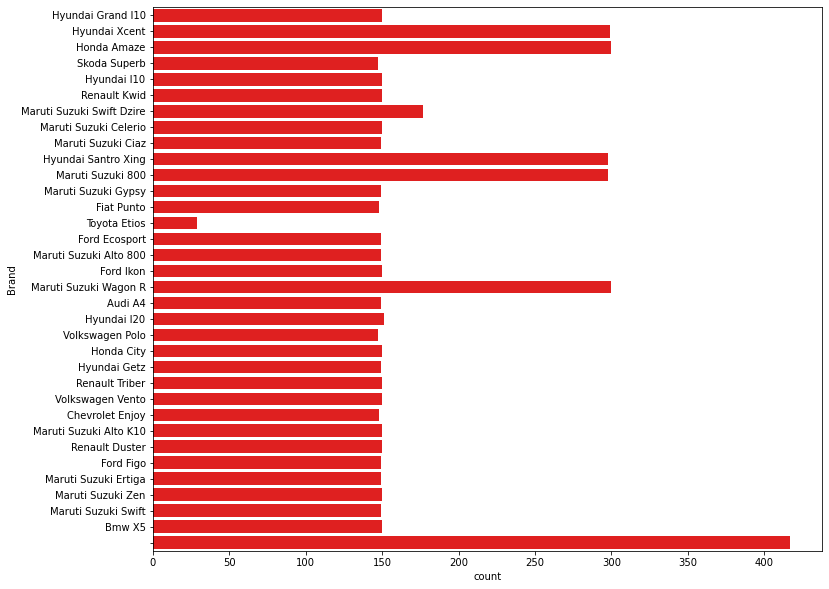

In [25]:
#using countplot
plt.figure(figsize=(12,10))
sns.countplot(y="Brand", data=df, color="RED")
plt.show()

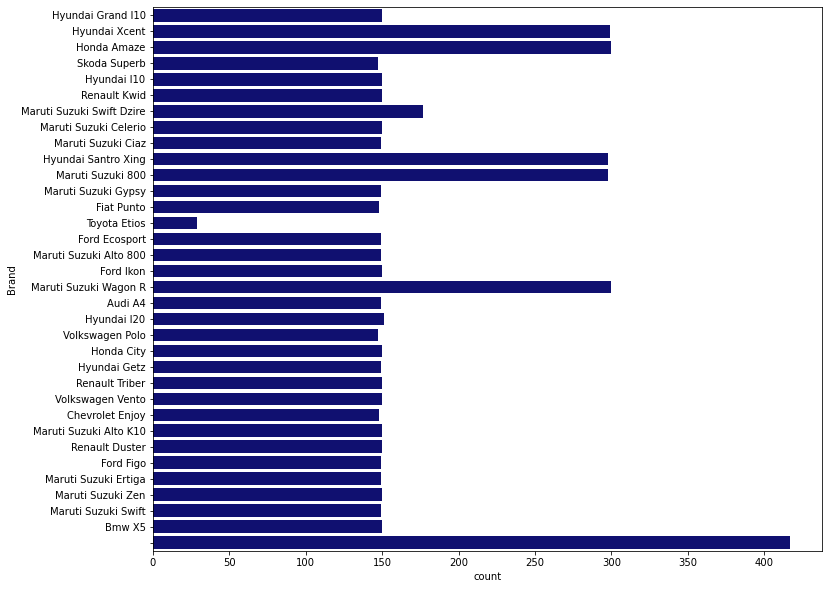

In [26]:
plt.figure(figsize=(12,10))
sns.countplot(y="Brand", data=df, color="navy")
plt.show()

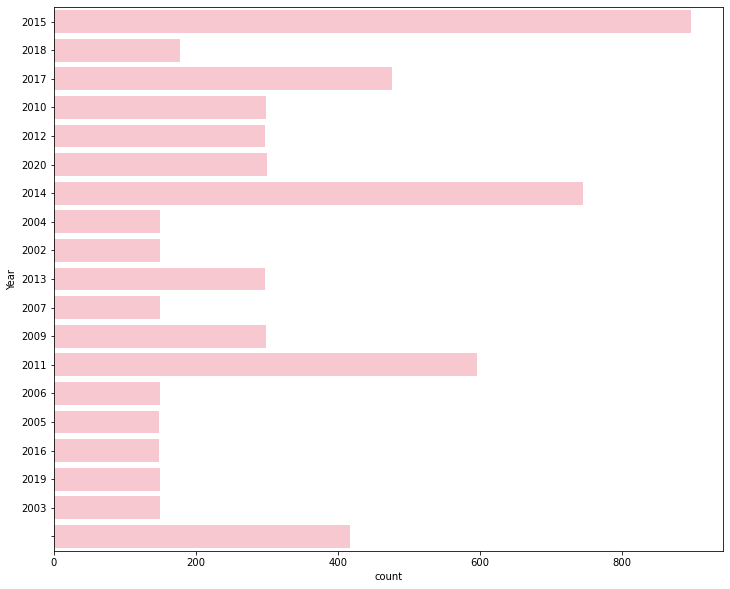

In [27]:
plt.figure(figsize=(12,10))
sns.countplot(y="Year", data=df, color="pink")
plt.show()

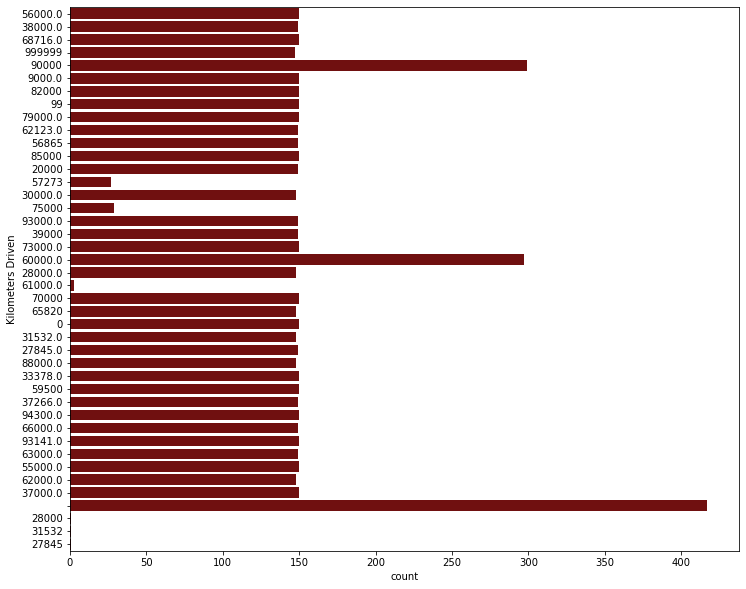

In [29]:
plt.figure(figsize=(12,10))
sns.countplot(y="Kilometers Driven", data=df, color="maroon")
plt.show()

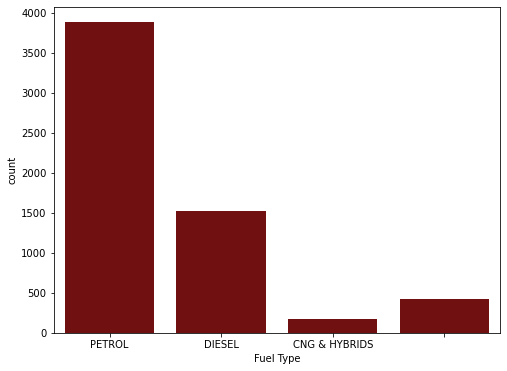

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x="Fuel Type", data=df, color="maroon")
plt.show()

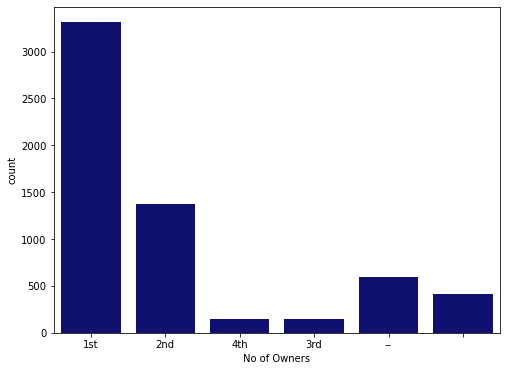

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x="No of Owners", data=df, color="navy")
plt.show()

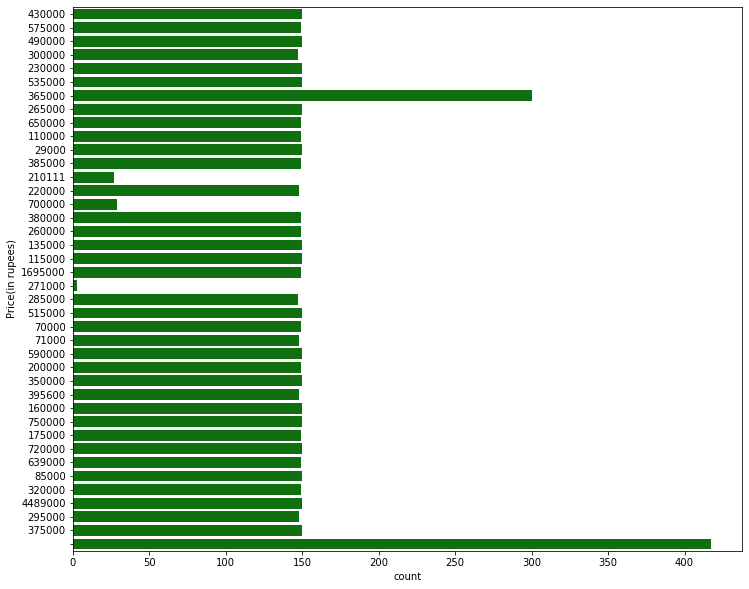

In [33]:
plt.figure(figsize=(12,10))
sns.countplot(y="Price(in rupees)", data=df, color="green")
plt.show()

<Figure size 1800x1296 with 0 Axes>

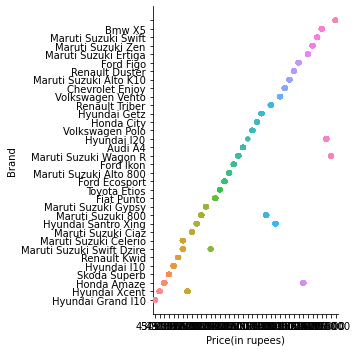

In [34]:
plt.figure(figsize=(25,18))
sns.catplot('Price(in rupees)', 'Brand', data = df)
plt.show()

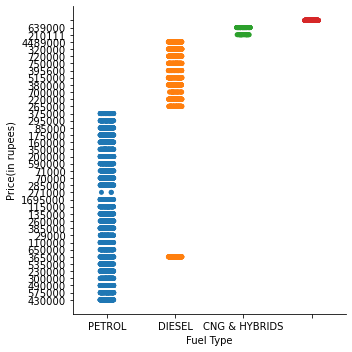

In [35]:
sns.catplot('Fuel Type','Price(in rupees)', data = df)

In [36]:
#Encoding:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [37]:
 from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Fuel Type'] = labelencoder.fit_transform(df['Fuel Type'])
df['No of Owners'] = labelencoder.fit_transform(df['No of Owners'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              6000 non-null   float64
 1   Year               6000 non-null   float64
 2   Kilometers Driven  6000 non-null   float64
 3   Fuel Type          6000 non-null   int64  
 4   No of Owners       6000 non-null   int64  
 5   Price(in rupees)   6000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 457.2 KB


<AxesSubplot:xlabel='Fuel Type', ylabel='Price(in rupees)'>

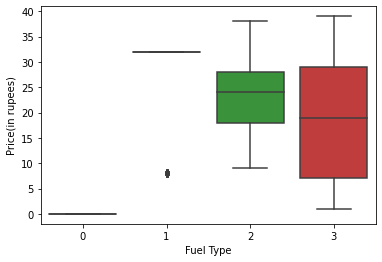

In [38]:
sns.boxplot('Fuel Type','Price(in rupees)', data = df)

<AxesSubplot:xlabel='No of Owners', ylabel='Price(in rupees)'>

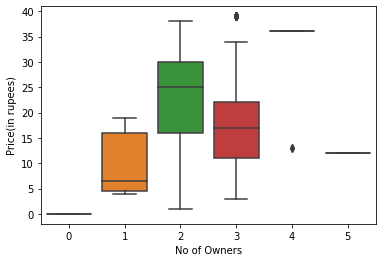

In [39]:
sns.boxplot('No of Owners','Price(in rupees)', data = df)

<AxesSubplot:xlabel='Year', ylabel='Kilometers Driven'>

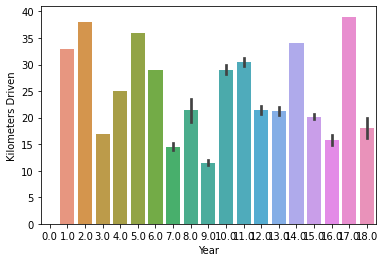

In [40]:
sns.barplot('Year','Kilometers Driven', data = df)

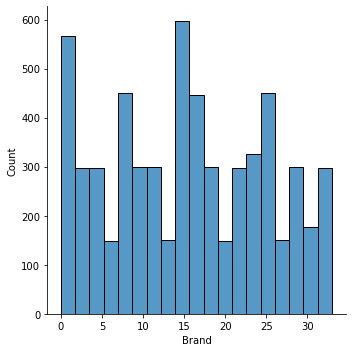

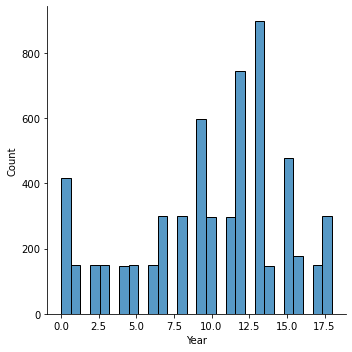

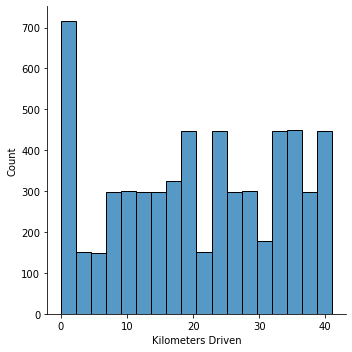

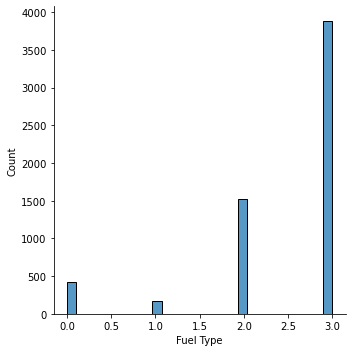

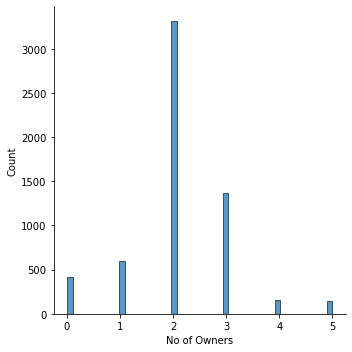

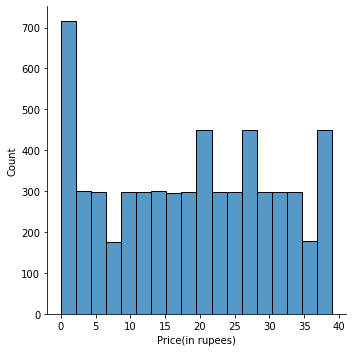

In [41]:
d=df.columns
for i in d:
    sns.displot(df[i])
    plt.show()

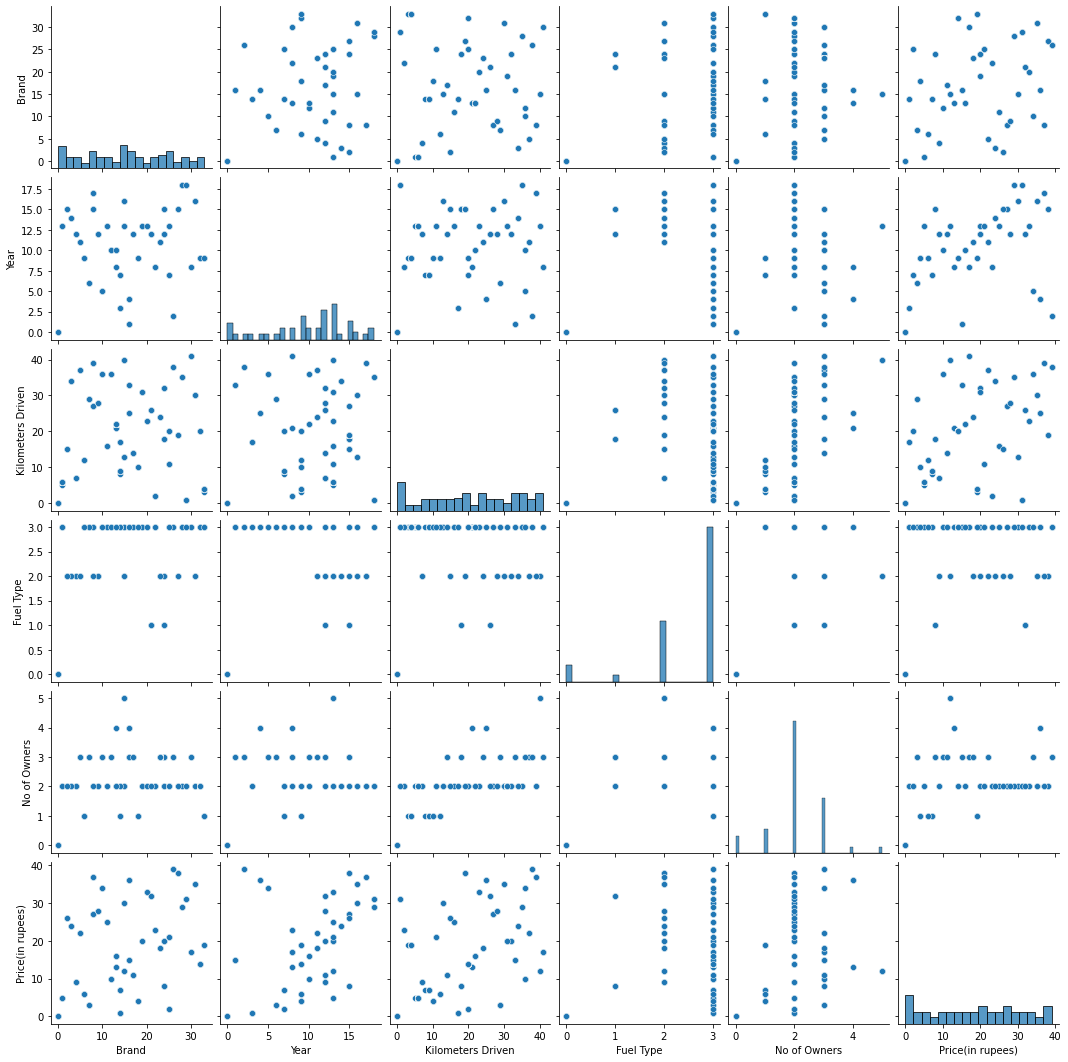

In [42]:
sns.pairplot(df)

In [43]:
#Statistical Summary:
df.describe()

,Brand,Year,Kilometers Driven,Fuel Type,No of Owners,Price(in rupees)
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,15.393333,9.982000,20.939667,2.479000,2.115000,18.730833
std,9.598592,4.921454,12.598551,0.851673,0.958433,11.856959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,11.000000,2.000000,2.000000,9.000000
50%,15.000000,11.000000,22.000000,3.000000,2.000000,20.000000
75%,24.000000,13.000000,32.000000,3.000000,3.000000,29.000000
max,33.000000,18.000000,41.000000,3.000000,5.000000,39.000000


<AxesSubplot:>

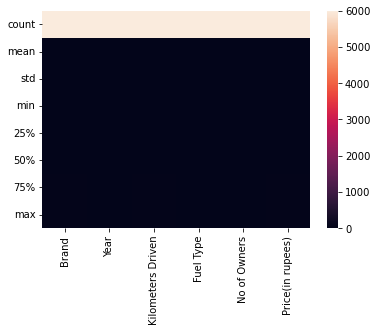

In [44]:
#using the heatmap
sns.heatmap(df.describe())

In [45]:
#Correlation:
df.corr()

,Brand,Year,Kilometers Driven,Fuel Type,No of Owners,Price(in rupees)
Brand,1.000000,0.204771,0.147224,0.442662,0.230403,0.338158
Year,0.204771,1.000000,0.168779,0.263584,0.189154,0.479037
Kilometers Driven,0.147224,0.168779,1.000000,0.229312,0.680626,0.413661
Fuel Type,0.442662,0.263584,0.229312,1.000000,0.420578,0.207588
No of Owners,0.230403,0.189154,0.680626,0.420578,1.000000,0.341083
Price(in rupees),0.338158,0.479037,0.413661,0.207588,0.341083,1.000000


<AxesSubplot:>

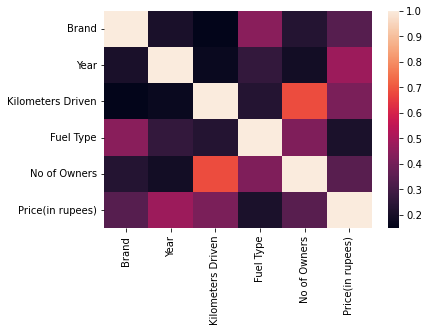

In [46]:
#using the heatmap
sns.heatmap(df.corr())

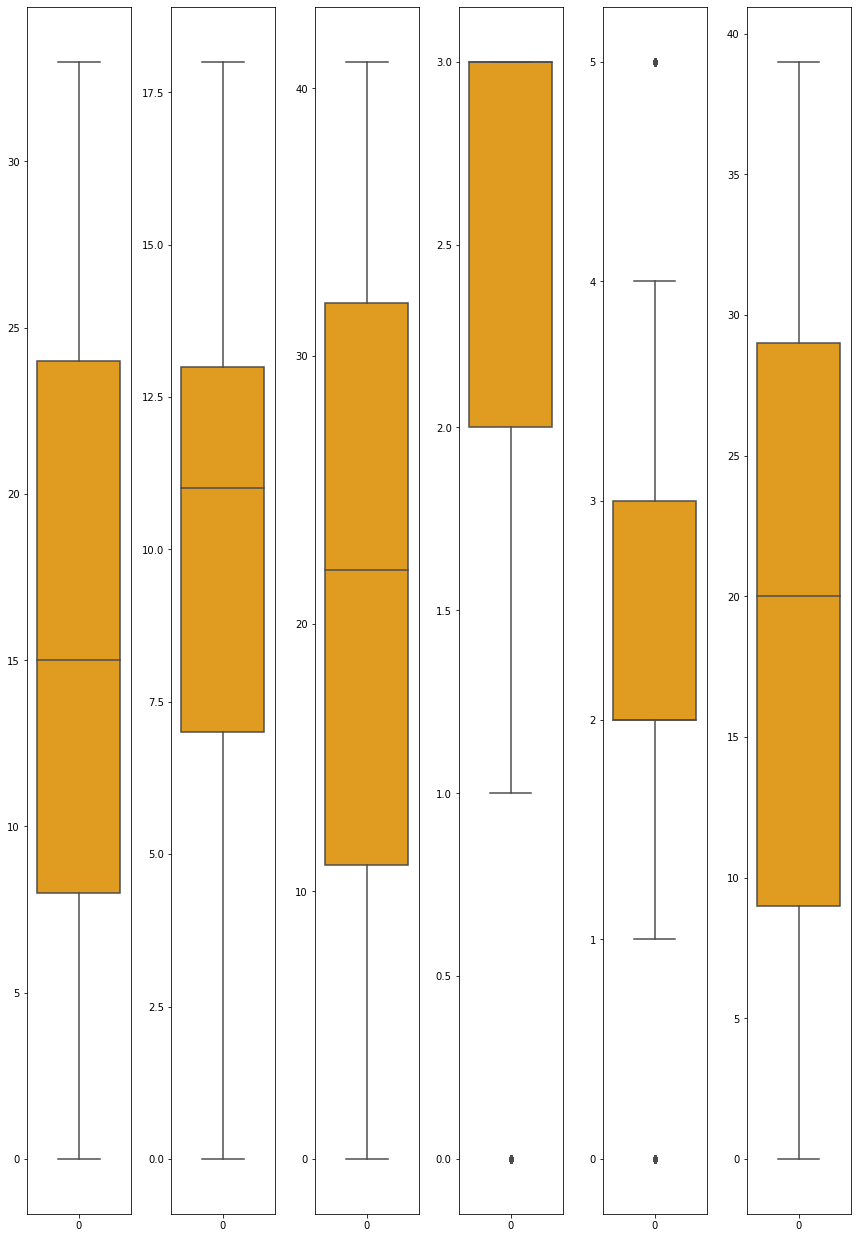

In [47]:
#Removing Outliers:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='orange',orient='v')
    plt.tight_layout()

In [48]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]
new_df.shape

(5850, 6)

In [49]:
df.shape

(6000, 6)

In [50]:


Data_loss = ((6000-5850)/6000)*100
Data_loss

2.5

In [51]:
#Skewness:
new_df.skew()

Brand                0.048972
Year                -0.483910
Kilometers Driven   -0.107523
Fuel Type           -1.803107
No of Owners        -0.521949
Price(in rupees)    -0.064198
dtype: float64

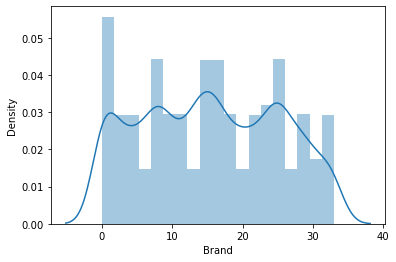

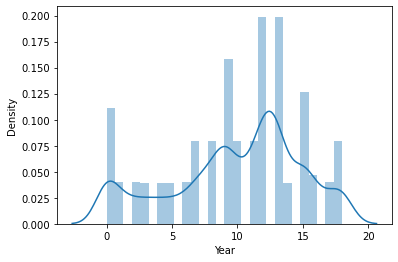

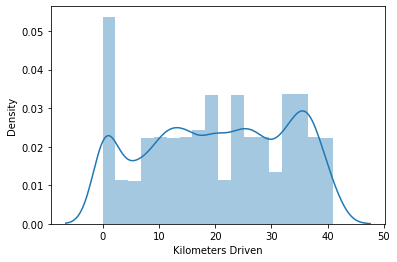

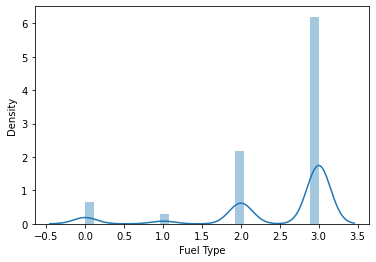

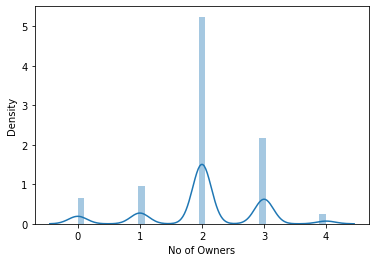

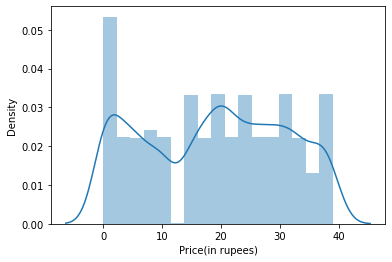

In [52]:
for i in new_df:
    sns.distplot(new_df[i])
    plt.show()

In [53]:
for i in new_df.columns:
    
    # we are using log transformation method to remove skewness
    if new_df.skew().loc[i]>0.5:
        new_df[i]=np.log1p(new_df[i])
        
        # we are using square method to remove skewness
        if new_df.skew().loc[i]<-0.5:
            new_df[i]=np.square(new_df[i])

In [54]:
new_df.skew()

Brand                0.048972
Year                -0.483910
Kilometers Driven   -0.107523
Fuel Type           -1.803107
No of Owners        -0.521949
Price(in rupees)    -0.064198
dtype: float64

In [55]:
#Spliting the data into Feature and Target:
x = df.drop(columns = "Price(in rupees)")
y = df["Price(in rupees)"]
x.shape

(6000, 5)

In [56]:
y.shape

(6000,)

In [57]:
x.head()

,Brand,Year,Kilometers Driven,Fuel Type,No of Owners
0,11.0,13.0,16.0,3,2
1,15.0,16.0,13.0,3,2
2,8.0,15.0,27.0,3,2
3,30.0,8.0,41.0,3,3
4,12.0,10.0,36.0,3,3


In [58]:
y.head()

0    25.0
1    30.0
2    27.0
3    17.0
4    10.0
Name: Price(in rupees), dtype: float64

In [59]:
y.value_counts()

0.0     417
20.0    300
3.0     150
21.0    150
26.0    150
39.0    150
37.0    150
38.0    150
4.0     150
19.0    150
31.0    150
28.0    150
2.0     150
25.0    150
15.0    150
10.0    150
27.0    150
29.0    150
12.0    150
7.0     149
18.0    149
32.0    149
6.0     149
33.0    149
22.0    149
1.0     149
34.0    149
23.0    149
30.0    149
5.0     149
11.0    149
16.0    148
36.0    148
24.0    148
9.0     148
14.0    147
17.0    147
35.0     29
8.0      27
13.0      3
Name: Price(in rupees), dtype: int64

In [60]:
#Scaling:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [63]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("We are getting the Best Accuracy is",maxAccu," on Random_state",maxRS)

We are getting the Best Accuracy is 0.43630550971551596  on Random_state 177


In [64]:
#Train Test Split the data:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=177)

In [65]:
x_train.shape

(4200, 5)

In [66]:
x_test.shape

(1800, 5)

In [67]:
y_train.shape

(4200,)

In [68]:
y_test.shape

(1800,)

In [69]:
# Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 43.6305509715516%


In [70]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 100.0%


In [71]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 99.99997141442796%


In [72]:
ls=Lasso()
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 40.445995780776734%


In [73]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 99.92532460439786%


In [74]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 99.8135798160431%


In [75]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 87.91083955045978%


In [77]:
#Cross Validation:
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print("Cross Validation Score for Linear Regression is : ",cvlr)

cvdtr=cross_val_score(dtr,x,y,cv=5).mean()
print("Cross Validation Score for Decision Tree Regressor is : ",cvdtr)

cvrfr=cross_val_score(rfr,x,y,cv=5).mean()
print("Cross Validation Score for Random Forest Regressorr is : ",cvrfr)

cvls=cross_val_score(ls,x,y,cv=5).mean()
print("Cross Validation Score for Lasso is : ",cvls)

cvknn=cross_val_score(knn,x,y,cv=5).mean()
print("Cross Validation Score for KNeighborsRegressor is : ",cvknn)

cvgbr=cross_val_score(gbr,x,y,cv=5).mean()
print("Cross Validation Score for Gradient Boosting Regressor is : ",cvgbr)

cvsvr=cross_val_score(svr,x,y,cv=5).mean()
print("Cross Validation Score for SVR is : ",cvsvr)



Cross Validation Score for Linear Regression is :  0.3884759812772919
Cross Validation Score for Decision Tree Regressor is :  0.967932059918095
Cross Validation Score for Random Forest Regressorr is :  0.9694962030824481
Cross Validation Score for Lasso is :  0.3687863162837826
Cross Validation Score for KNeighborsRegressor is :  0.9782412198789132
Cross Validation Score for Gradient Boosting Regressor is :  0.9872538824823375
Cross Validation Score for SVR is :  0.8566645057955327


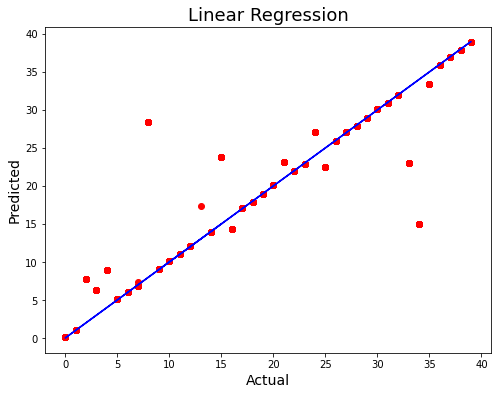

In [78]:

#Overfitting & Underfitting:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()


In [79]:
#Hyper Parameter Tuning:
#We are selecting Gradient Boosting Regressor as our best model as it has least difference between it's Accuracy score and CV score.

from sklearn.model_selection import GridSearchCV

In [80]:
parameter={'max_depth':[100,200,500,1000],
           'n_estimators':[10,100,500],
          'subsample':[0.001,0.01,0.1,1.0],
           'random_state':[50,100,200]}
GCV = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [100, 200, 500, 1000],
                         'n_estimators': [10, 100, 500],
                         'random_state': [50, 100, 200],
                         'subsample': [0.001, 0.01, 0.1, 1.0]})

In [81]:
GCV.best_params_

{'max_depth': 100, 'n_estimators': 500, 'random_state': 50, 'subsample': 1.0}

In [82]:
car_price_final=GradientBoostingRegressor(max_depth=100, n_estimators=500, random_state=50, subsample=1.0)
car_price_final.fit(x_train,y_train)
pred=car_price_final.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

100.0


In [83]:
#Saving the model:
import joblib
joblib.dump(car_price_final,"Car_price_prediction(submission).pkl")

['Car_price_prediction(submission).pkl']

In [84]:
Car_price_model = joblib.load(open('Car_price_prediction(submission).pkl','rb'))
result = Car_price_model.score(x_test,y_test)
print(result)

1.0


In [85]:
Conclusion = pd.DataFrame([Car_price_model.predict(x_test)[:],gbr.predict(x_test)[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
Predicted,15.000000,12.000000,4.000000,2.477026e-22,24.000000,28.000000,31.000000,3.00000,19.000000,19.000000,...,33.000000,2.477026e-22,37.000000,10.000000,5.000000,30.000000,20.000000,37.000000,38.000000,9.000000
Original,15.052928,12.380229,5.111348,-8.604932e-02,23.912117,27.497938,31.150626,3.61037,18.970422,18.970422,...,32.658343,-8.604932e-02,36.785034,10.837653,5.596419,29.676984,20.307261,36.785034,37.491504,9.131715
